In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
import plot_utils as p


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
def merge_data_frames2(cancer):
    egfr = cancer.get_genotype_all_vars("EGFR")
    compare = ['Wildtype_Tumor','Amplification']
    get = egfr['Mutation'].isin(compare)
    egfr_amp_wt = egfr[get]
    
    
    pten = cancer.get_genotype_all_vars("PTEN")
    compare = ['Wildtype_Tumor','Deletion']
    get = pten['Mutation'].isin(compare)
    pten_del_wt = pten[get]
    all_mut = pd.merge(pten_del_wt, egfr_amp_wt, on="Patient_ID", how = "outer")
    all_mut = all_mut.rename(columns={"Mutation_x": "PTEN_Mutation","Mutation_y":"EGFR_Mutation"  })
    
    all_mut = all_mut[["EGFR_Mutation","PTEN_Mutation"]]
    return all_mut

In [96]:
def HasMutation(row):
    hasMut1 = False
    hasMut2 = False
    for item in row:
        if pd.isnull(item):
            continue
        if item == "Amplification":
            hasMut1 = True
        if item == "Deletion":
            hasMut2 = True
            
    if hasMut1 & hasMut2:
        return "Both"
    if hasMut1 & (hasMut2 == False):
        return "EGFR_mut"
    if (hasMut1 == False) & hasMut2:
        return "Pten_mut"
    return "Wildtype_tumor"

In [91]:
g = cptac.Gbm()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


In [97]:
gbm = merge_data_frames2(g)
gbm["Mutation_type"] = gbm.apply(HasMutation, axis = 1)
gbm.head(20)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 383)


Name,EGFR_Mutation,PTEN_Mutation,Mutation_type
Patient_ID,,,
C3L-00104,Amplification,Deletion,Both
C3L-00365,NaN,Deletion,Pten_mut
C3L-00674,Amplification,Deletion,Both
C3L-00677,Amplification,Deletion,Both
C3L-01040,Amplification,Deletion,Both
C3L-01043,Amplification,Deletion,Both
C3L-01045,Amplification,Deletion,Both
C3L-01046,Amplification,Deletion,Both
C3L-01048,Amplification,Deletion,Both


In [98]:
protomics = g.get_proteomics()
prot = protomics[["CD4","SYK","MCM2","MCM4","EGFR","PTEN","GRB2"]]

In [99]:

prot_mut = pd.merge(gbm, prot, on="Patient_ID", how = "inner")
prot_mut.head(20)

Name,EGFR_Mutation,PTEN_Mutation,Mutation_type,CD4,SYK,MCM2,MCM4,EGFR,PTEN,GRB2
Patient_ID,,,,,,,,,,
C3L-00104,Amplification,Deletion,Both,-0.348156,-0.396156,0.865204,0.836100,1.054962,-0.431991,0.005740
C3L-00365,NaN,Deletion,Pten_mut,-0.174919,-0.405143,0.943165,0.842492,2.219562,-0.265044,-0.753223
C3L-00674,Amplification,Deletion,Both,0.324480,0.565983,-0.236399,-0.092442,0.137329,0.390190,0.231245
C3L-00677,Amplification,Deletion,Both,-0.457509,-0.180069,-0.093372,-0.115375,-0.768478,-0.915526,-0.209354
C3L-01040,Amplification,Deletion,Both,-0.583125,-0.360852,-0.957693,-1.071222,-1.249435,0.680291,-0.471144
C3L-01043,Amplification,Deletion,Both,0.105619,0.557408,0.152897,0.160211,0.721186,-0.580510,0.062017
C3L-01045,Amplification,Deletion,Both,-0.190489,0.192672,0.463109,0.304475,0.423029,0.093666,-0.070315
C3L-01046,Amplification,Deletion,Both,1.439368,1.360826,0.113851,0.008782,-0.967750,-0.341718,0.840417
C3L-01048,Amplification,Deletion,Both,-0.386704,-0.481321,0.248386,0.239479,3.496717,-0.068617,-0.902563


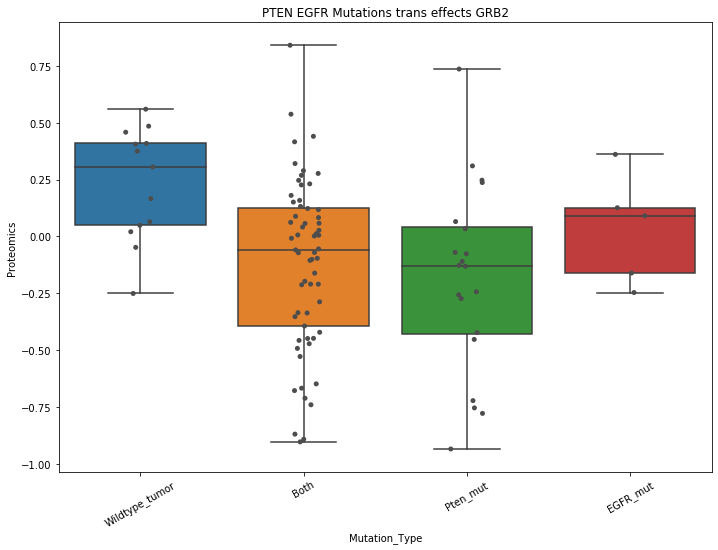

In [101]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
gene = "GRB2"
somatic_boxplot = sns.boxplot(data=prot_mut, x= "Mutation_type", y=gene, ax = ax, 
                              order=["Wildtype_tumor","Both","Pten_mut","EGFR_mut"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN EGFR Mutations trans effects " + gene)
somatic_boxplot = sns.stripplot(data=prot_mut, x="Mutation_type" ,y=gene,jitter=True, 
                                color=".3", order=["Wildtype_tumor","Both","Pten_mut","EGFR_mut"])
somatic_boxplot.set(xlabel="Mutation_Type",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()